**Question:**
*Temporal changes in serotype distribution*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import io
import pandas as pd
import seaborn as sns
import math

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
data=files.upload()

Saving Serotype_Distribution_(2016-Present).csv to Serotype_Distribution_(2016-Present).csv


In [3]:
df1=pd.read_csv(io.StringIO(data['Serotype_Distribution_(2016-Present).csv'].decode('utf-8')))

In [4]:
data=files.upload()

Saving Serotype_Distribution_(2009-2015).csv to Serotype_Distribution_(2009-2015).csv


In [5]:
df2=pd.read_csv(io.StringIO(data['Serotype_Distribution_(2009-2015).csv'].decode('utf-8')))

In [6]:
df1

,serotype,Frequency_till_present
0,1,31
1,2,22
2,8,15
3,23F,11
4,5,11
...,...,...
61,7F/A,1
62,9L,1
63,NTD,25
64,NoPCV13,20


In [7]:
df2

,serotype,Frequency_till15
0,2,27
1,19F,26
2,1,24
3,23F,18
4,5,17
...,...,...
58,NON TYPABLE,1
59,NTD,104
60,QNS,19
61,ND,14


In [8]:
df1.drop(df1[df1['serotype'] == 'ND'].index, inplace = True)
df1.drop(df1[df1['serotype'] == 'NoPCV13'].index, inplace = True)
df1.drop(df1[df1['serotype'] == 'QNS'].index, inplace = True)
df1.drop(df1[df1['serotype'] == 'NON TYPABLE'].index, inplace = True)
df1.drop(df1[df1['serotype'] == 'NTD'].index, inplace = True)
df1

,serotype,Frequency_till_present
0,1,31
1,2,22
2,8,15
3,23F,11
4,5,11
...,...,...
58,6C/D,1
59,7A/F,1
60,7B/C,1
61,7F/A,1


In [9]:
df2.drop(df2[df2['serotype'] == 'ND'].index, inplace = True)
df2.drop(df2[df2['serotype'] == 'NoPCV13'].index, inplace = True)
df2.drop(df2[df2['serotype'] == 'QNS'].index, inplace = True)
df2.drop(df2[df2['serotype'] == 'NON TYPABLE'].index, inplace = True)
df2.drop(df2[df2['serotype'] == 'NTD'].index, inplace = True)
df2

,serotype,Frequency_till15
0,2,27
1,19F,26
2,1,24
3,23F,18
4,5,17
5,6B,16
6,8,16
7,19A,13
8,12,12
9,23B,12


In [10]:
df3=pd.concat([df1['serotype'],df1['Frequency_till_present'],df2['Frequency_till15']],axis=1)
df3

,serotype,Frequency_till_present,Frequency_till15
0,1,31,27.0
1,2,22,26.0
2,8,15,24.0
3,23F,11,18.0
4,5,11,17.0
...,...,...,...
58,6C/D,1,NaN
59,7A/F,1,NaN
60,7B/C,1,NaN
61,7F/A,1,NaN


In [ ]:
te=pd.DataFrame(df3)
te.to_excel("Concat.xlsx")

In [11]:
df3['post-pre'] = df3['Frequency_till_present'] - df3['Frequency_till15']

In [12]:
df3.head(50)

,serotype,Frequency_till_present,Frequency_till15,post-pre
0,1,31,27.0,4.0
1,2,22,26.0,-4.0
2,8,15,24.0,-9.0
3,23F,11,18.0,-7.0
4,5,11,17.0,-6.0
5,35B,9,16.0,-7.0
6,12A/F,8,16.0,-8.0
7,18C,7,13.0,-6.0
8,19A,7,12.0,-5.0
9,34,7,12.0,-5.0


In [13]:
plt.rcParams['figure.figsize'] = [40,20]

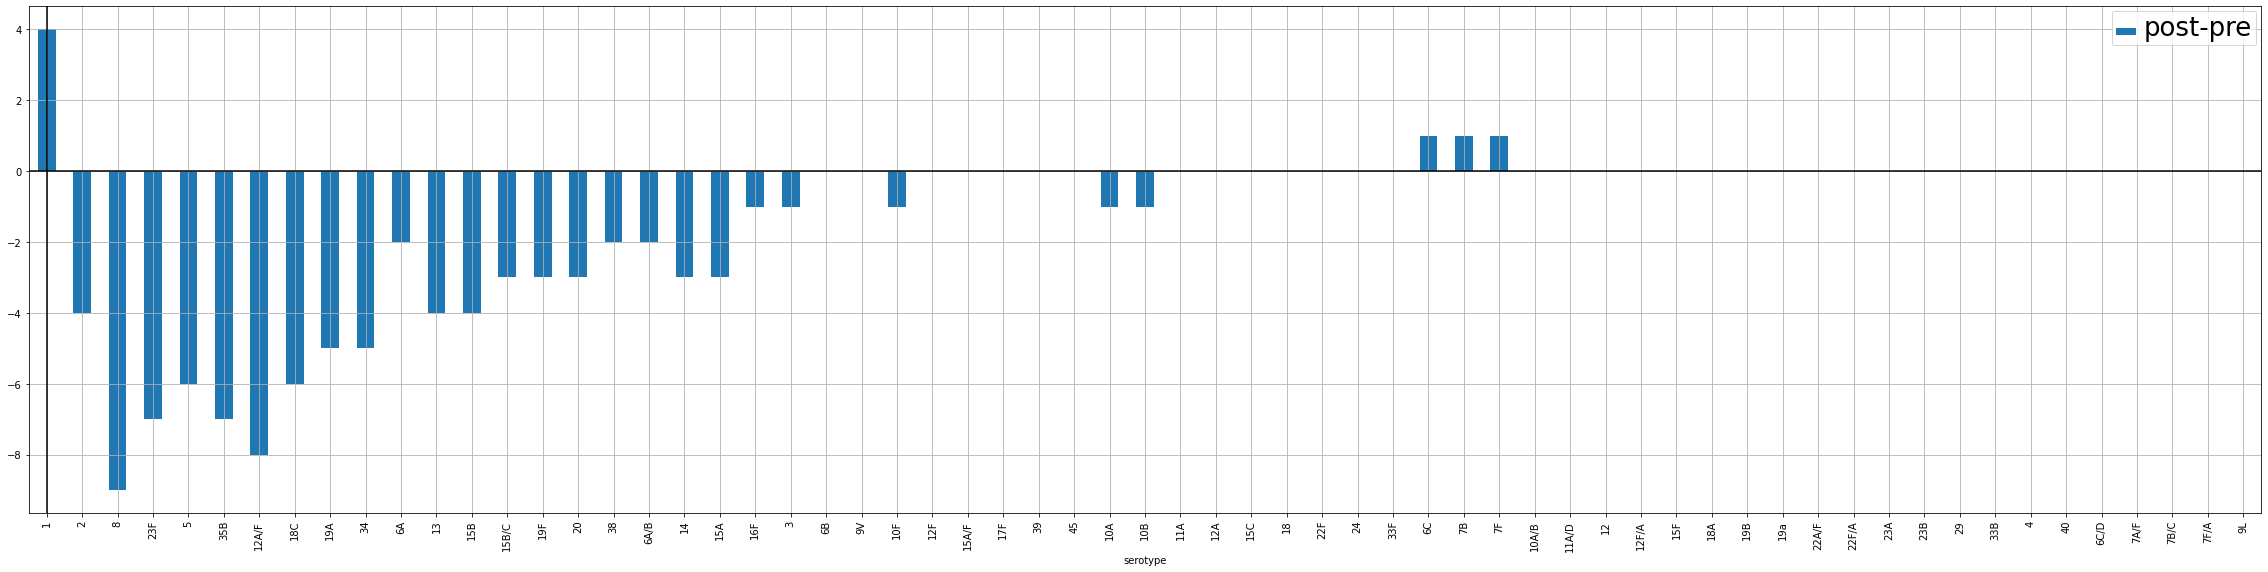

In [17]:
ax_1 = df3.plot.bar(x='serotype',y='post-pre')
plt.setp(ax_1.get_legend().get_texts(), fontsize='26') # for legend text
plt.setp(ax_1.get_legend().get_title(), fontsize='32') # for legend title

ax_1.set_aspect('equal')
ax_1.grid(True, which='both')

ax_1.axhline(y=0, color='k')
ax_1.axvline(x=0, color='k')

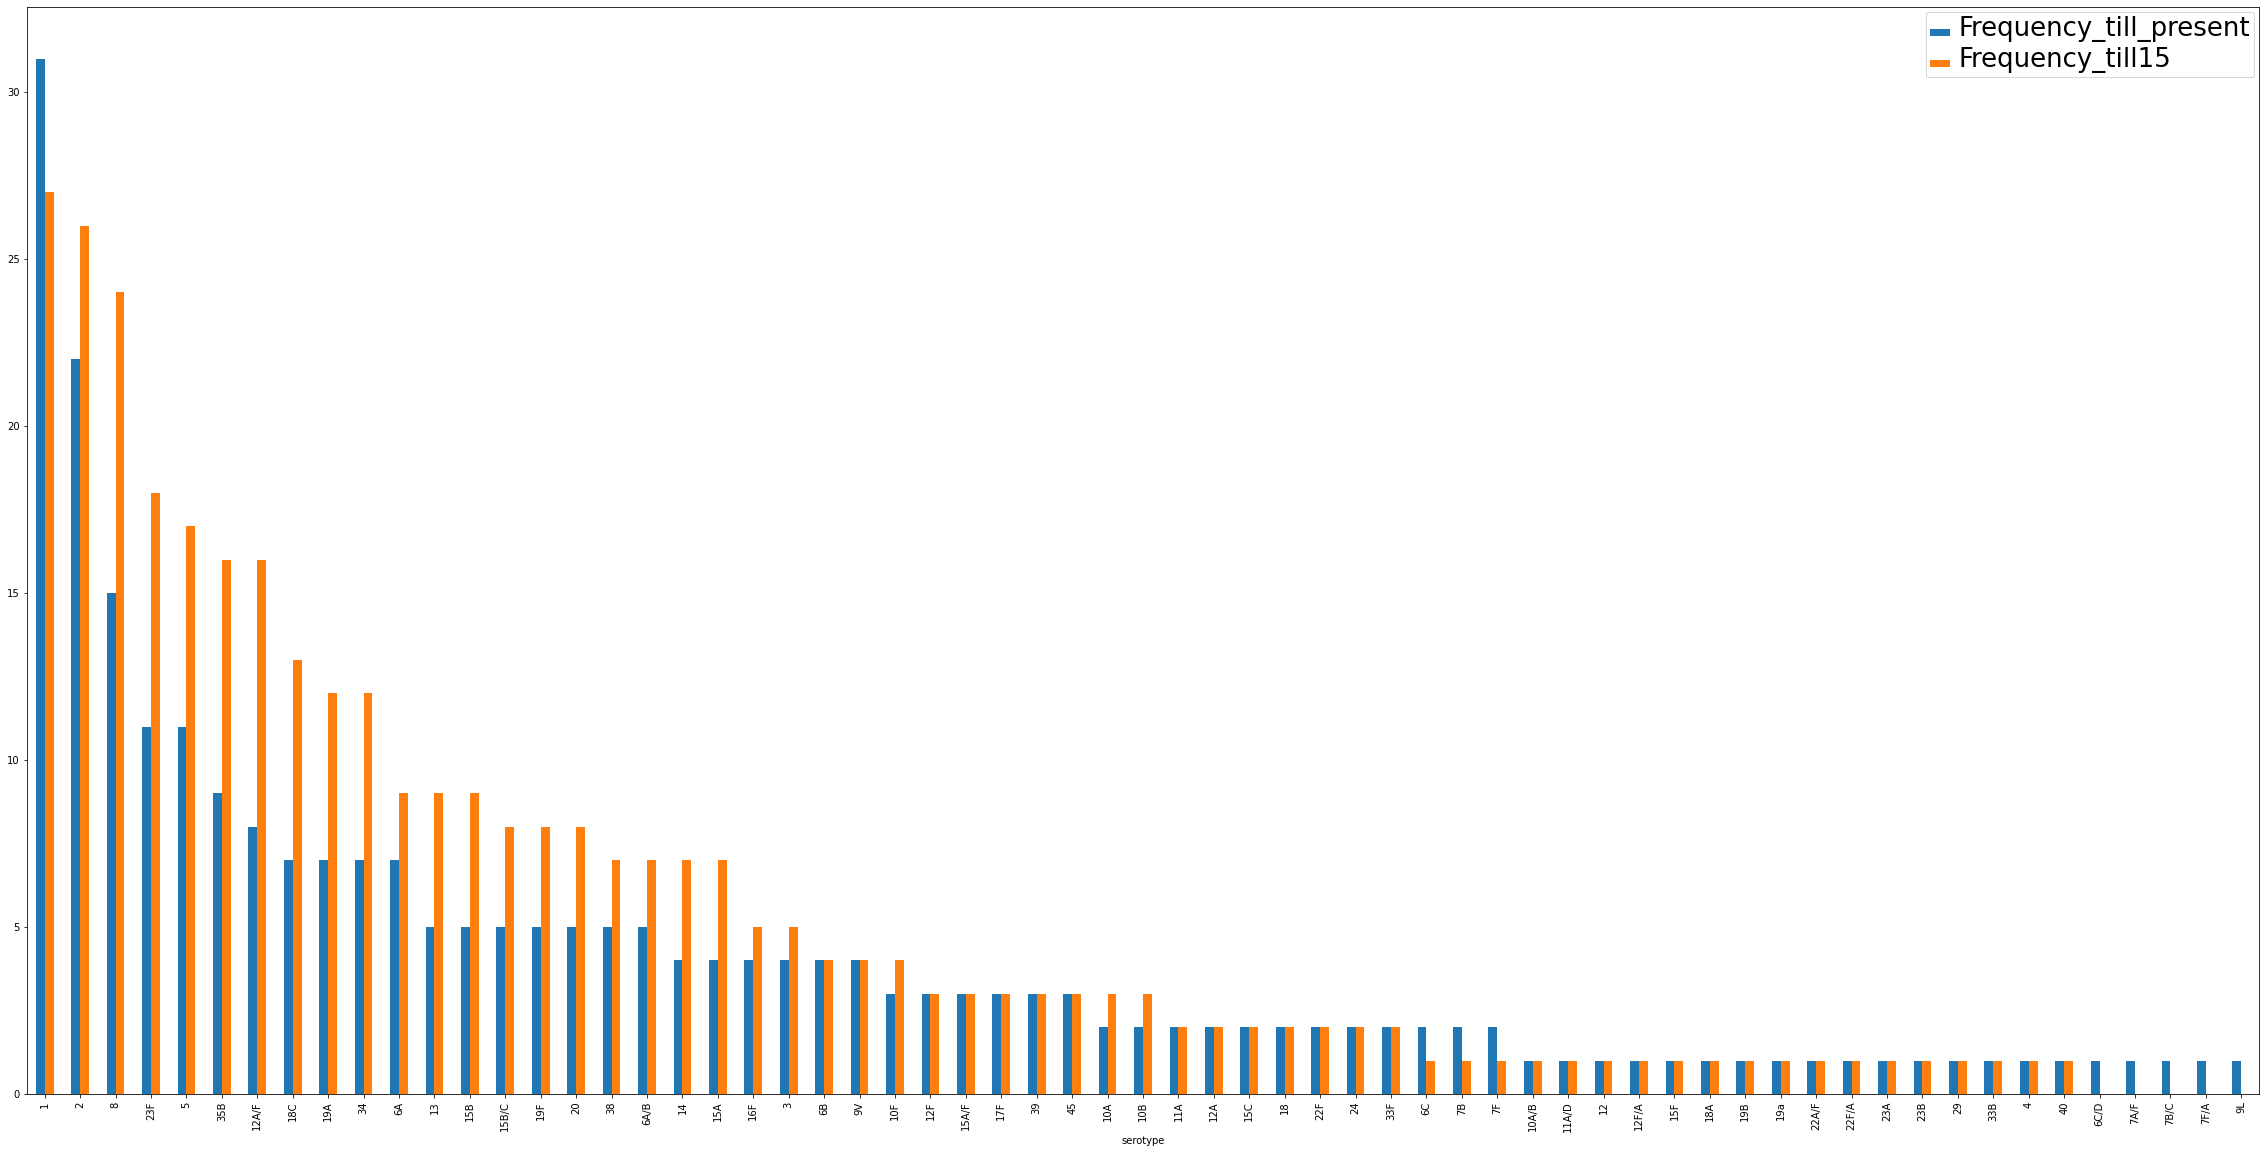

In [ ]:
ax = df3.plot.bar(x='serotype')
plt.setp(ax.get_legend().get_texts(), fontsize='26') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='32') # for legend title

plt.show()